## Cournot Equilibrium with Asymmetric Costs

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# parameters
alpha_d = 100
beta_d = 0.5
# marginal cost for Firm 1
b1 = 0.5  
# marginal cost for Firm 2
b2 = 0.1  






# --- Cournot Equilibrium ---

# Create an array for q₁ values (upper bound based on Firm 2's intercept)
q1_vals = np.linspace(0, alpha_d - beta_d*b2, 200)

# Best response functions
q2_br_A = alpha_d - beta_d*b1 - 2 * q1_vals
q2_br_B = (alpha_d - beta_d*b2 - q1_vals) / 2.

# Cournot equilibrium from simultaneous solution
q1_eq = (alpha_d + beta_d*(b2 - 2*b1)) / 3.
q2_eq = (alpha_d + beta_d*(b1 - 2*b2)) / 3.
cournot_eq = (q1_eq, q2_eq)

# Market price at Cournot equilibrium
p_cournot = (alpha_d + beta_d*(b1+b2)) / (3*beta_d)

# profits at Cournot equilibrium
pi1_cournot = (p_cournot - b1) * q1_eq
pi2_cournot = (p_cournot - b2) * q2_eq





# --- Cartel Outcome (Equal Split) ---
# notes
# Assuming the cartel maximizes joint profit subject to q₁ = q₂ = Q/2.
# Joint profit: π = Q*(alpha_d - Q)/beta_d - (b1+b2)*(Q/2).
# FOC: (alpha_d - 2Q)/beta_d - (b1+b2)/2 = 0  -> Q = (alpha_d - beta_d*(b1+b2)/2) / 2.
Q_cartel = (alpha_d - beta_d*(b1+b2)/2) / 2.
q1_cartel = Q_cartel / 2.
q2_cartel = Q_cartel / 2.


# Market price under cartel:
p_cartel = (alpha_d - Q_cartel) / beta_d





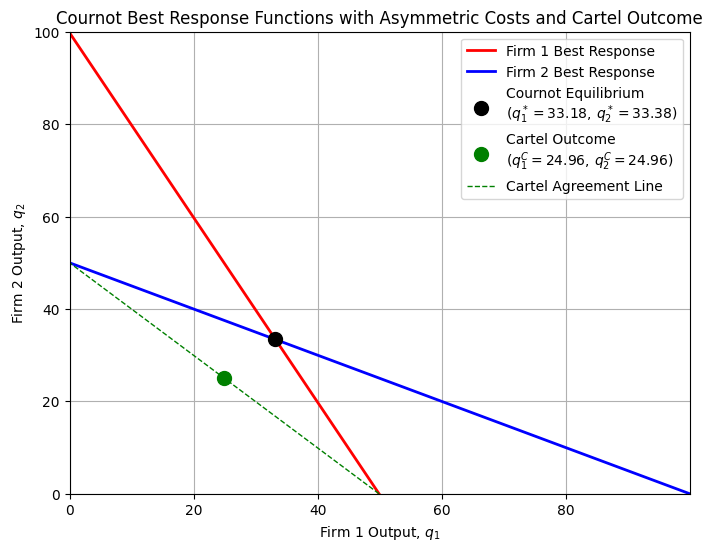

In [ ]:

# --- Plotting ---
plt.figure(figsize=(8,6))
plt.plot(q1_vals, q2_br_A, label="Firm 1 Best Response", color="red", lw=2)
plt.plot(q1_vals, q2_br_B, label="Firm 2 Best Response", color="blue", lw=2)

# Mark the Cournot equilibrium point (black)
plt.scatter(*cournot_eq, color='black', s=100, zorder=5, 
            label="Cournot Equilibrium\n($q_1^*={:.2f},\,q_2^*={:.2f}$)".format(q1_eq, q2_eq))
# Mark the Cartel outcome (green)
plt.scatter(q1_cartel, q2_cartel, color='green', s=100, zorder=5, 
            label="Cartel Outcome\n($q_1^C={:.2f},\,q_2^C={:.2f}$)".format(q1_cartel, q2_cartel))




# Cartel Agreement Line (notes)
# Instead of joining (0, α - β_d*b1) with (α - β_d*b2, 0),
# we connect the alternative intercepts:
# Firm 1's best response gives x-intercept (when q2=0):
q1_intercept = (alpha_d - beta_d*b1) / 2.
# Firm 2's best response gives y-intercept (when q1=0):
q2_intercept = (alpha_d - beta_d*b2) / 2.





plt.plot([q1_intercept, 0], [0, q2_intercept],
         color='green', linestyle='--', lw=1, label="Cartel Agreement Line")

plt.xlabel("Firm 1 Output, $q_1$")
plt.ylabel("Firm 2 Output, $q_2$")
plt.title("Cournot Best Response Functions with Asymmetric Costs and Cartel Outcome")
plt.legend()
plt.grid(True)
plt.xlim(0, alpha_d - beta_d*b2)
plt.ylim(0, alpha_d)
plt.show()


In [ ]:
# results
print("Cournot Equilibrium:")
print(f"  Firm 1 Output (q₁*): {q1_eq:.2f}")
print(f"  Firm 2 Output (q₂*): {q2_eq:.2f}")
print(f"  Total Output (Q): {q1_eq + q2_eq:.2f}")
print(f"  Market Price (p): {p_cournot:.2f}")
print(f"  Firm 1 Profit: {pi1_cournot:.2f}")
print(f"  Firm 2 Profit: {pi2_cournot:.2f}")
print(f"  Total Profit: {pi1_cournot + pi2_cournot:.2f}\n")

print("Cartel Outcome (Equal Split Assumption):")
print(f"  Firm 1 Output (q₁^C): {q1_cartel:.2f}")
print(f"  Firm 2 Output (q₂^C): {q2_cartel:.2f}")
print(f"  Total Output (Q): {Q_cartel:.2f}")
print(f"  Market Price (p): {p_cartel:.2f}")
print(f"  Firm 1 Profit: {(p_cartel - b1) * q1_cartel:.2f}")
print(f"  Firm 2 Profit: {(p_cartel - b2) * q2_cartel:.2f}")
print(f"  Total Profit: {(p_cartel - (b1+b2)) * Q_cartel:.2f}")

Cournot Equilibrium:
  Firm 1 Output (q₁*): 33.18
  Firm 2 Output (q₂*): 33.38
  Total Output (Q): 66.57
  Market Price (p): 66.87
  Firm 1 Profit: 2202.27
  Firm 2 Profit: 2228.89
  Total Profit: 4431.16

Cartel Outcome (Equal Split Assumption):
  Firm 1 Output (q₁^C): 24.96
  Firm 2 Output (q₂^C): 24.96
  Total Output (Q): 49.92
  Market Price (p): 100.15
  Firm 1 Profit: 2487.51
  Firm 2 Profit: 2497.50
  Total Profit: 4970.03


## Simulation of Iterative Best Responses with Asymmetric Costs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set parameters
alpha_d = 100
beta_d = 0.5
# marginal cost for Firm 1
b1 = 0.5  
# marginal cost for Firm 2
b2 = 0.1  


def best_response_firm2(q1):
    return (alpha_d - q1 - beta_d * b2) / 2.0

def best_response_firm1(q2):
    return (alpha_d - q2 - beta_d * b1) / 2.0



# Cournot equilibrium from simultaneous
q1_eq = (alpha_d + beta_d * (b2 - 2*b1)) / 3.0
q2_eq = (alpha_d + beta_d * (b1 - 2*b2)) / 3.0
cournot_eq = (q1_eq, q2_eq)

# Simulation parameters

# starting output for Firm 1
start_q1 = 3.0  
iterations = 10  

# initial point on Firm 1's best-response line:
# Firm 1's best response function

start_q2 = (alpha_d - beta_d * b1) - 2 * start_q1

# start the trajectory with the starting point

trajectory = []

q1, q2 = start_q1, start_q2
trajectory.append((q1, q2))




# iterative 

for _ in range(iterations):
    # Firm 2 updates its output given Firm 1's last move.
    new_q2 = best_response_firm2(q1)
    trajectory.append((q1, new_q2))
    
    # Firm 1 updates its output given Firm 2's move.
    new_q1 = best_response_firm1(new_q2)
    trajectory.append((new_q1, new_q2))
    
    q1, q2 = new_q1, new_q2




# best response curves for plotting:
q1_vals = np.linspace(0, alpha_d - beta_d * b2, 200)
# red curve (Firm 1)
q2_br_A = alpha_d - beta_d * b1 - 2 * q1_vals      
 # blue curve (Firm 2)
q2_br_B = (alpha_d - beta_d * b2 - q1_vals) / 2.0   





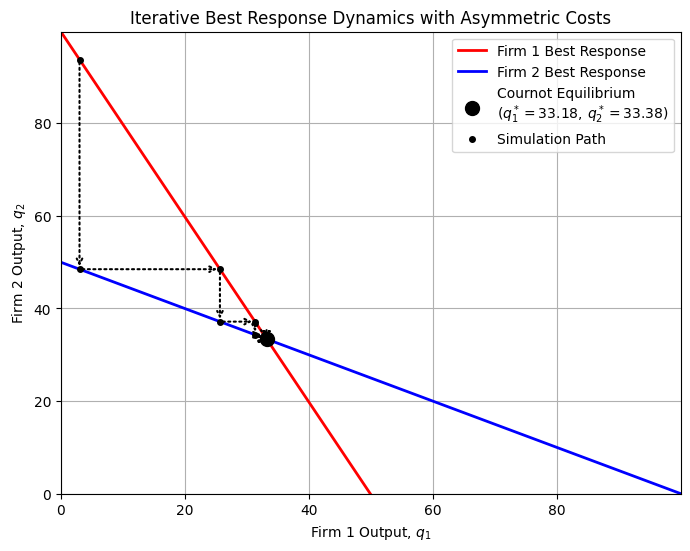

In [14]:

# --- Plotting ---

plt.figure(figsize=(8, 6))
plt.plot(q1_vals, q2_br_A, label="Firm 1 Best Response", color="red", lw=2)
plt.plot(q1_vals, q2_br_B, label="Firm 2 Best Response", color="blue", lw=2)
plt.scatter(*cournot_eq, color='black', s=100, zorder=5, 
            label="Cournot Equilibrium\n($q_1^*={:.2f},\,q_2^*={:.2f}$)".format(q1_eq, q2_eq))

# Plot the simulation trajectory using dotted black arrows.
traj_points = np.array(trajectory)
for i in range(1, len(traj_points)):
    x_prev, y_prev = traj_points[i-1]
    x_curr, y_curr = traj_points[i]
    plt.annotate("",
                 xy=(x_curr, y_curr), xycoords='data',
                 xytext=(x_prev, y_prev), textcoords='data',
                 arrowprops=dict(arrowstyle="->", color="black", linestyle="dotted", lw=1.5))

# Also mark the simulation points.
plt.plot(traj_points[:, 0], traj_points[:, 1], 'ko', markersize=4, label='Simulation Path')

plt.xlabel("Firm 1 Output, $q_1$")
plt.ylabel("Firm 2 Output, $q_2$")
plt.title("Iterative Best Response Dynamics with Asymmetric Costs")
plt.legend()
plt.grid(True)
plt.xlim(0, alpha_d - beta_d * b2)
plt.ylim(0, alpha_d - beta_d * b1)
plt.show()


In [ ]:

# results
p_cournot = (alpha_d + beta_d*(b1+b2)) / (3 * beta_d)
print("Cournot Equilibrium:")
print(f"  Firm 1 Output (q₁*): {q1_eq:.2f}")
print(f"  Firm 2 Output (q₂*): {q2_eq:.2f}")
print(f"  Total Output (Q): {q1_eq + q2_eq:.2f}")
print(f"  Market Price (p): {p_cournot:.2f}")

Cournot Equilibrium:
  Firm 1 Output (q₁*): 33.18
  Firm 2 Output (q₂*): 33.38
  Total Output (Q): 66.57
  Market Price (p): 66.87
